In [7]:
from sklearn import datasets
from imports import *
# 允许多行输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [13]:
data1 = datasets.load_boston()
data_x = data1.data
data_y = data1.target


In [14]:
model = LinearRegression()
# 训练模型
model.fit(data_x,data_y)
# 预测模型
model.predict(data_x[:4,:])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

array([ 30.00821269,  25.0298606 ,  30.5702317 ,  28.60814055])

In [15]:
# 参数
model.coef_
model.intercept_
# 分别取出模型的斜率和截距

array([ -1.07170557e-01,   4.63952195e-02,   2.08602395e-02,
         2.68856140e+00,  -1.77957587e+01,   3.80475246e+00,
         7.51061703e-04,  -1.47575880e+00,   3.05655038e-01,
        -1.23293463e-02,  -9.53463555e-01,   9.39251272e-03,
        -5.25466633e-01])

36.491103280360882

In [16]:
model.get_params
# 取出之前定义的参数

<bound method LinearRegression.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>

In [17]:
model.score(data_x,data_y)
# 对模型用R2进行打分，输出精确度
# R2决定系数（拟合优度）

0.7406077428649428

#### 数据标准化

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

0.48888888888888887

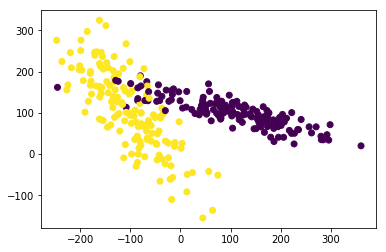

In [50]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
# 标准化数据模块
# 生成适合做classification资料的模块
from sklearn.datasets.samples_generator import make_classification

from sklearn.svm import SVC

X,y = make_classification(
    n_samples =300,
    n_features = 2,
    n_redundant = 0,
    n_informative = 2,
    random_state = 22,
    n_clusters_per_class = 1,
    scale = 100
)
plt.scatter(X[:,0],X[:,1],c=y) #c是color
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf = SVC()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

0.933333333333


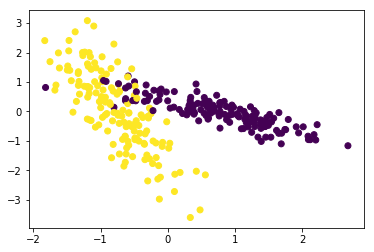

In [53]:
X = preprocessing.scale(X) # 这里是进行标准化的语句
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf = SVC()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
plt.scatter(X[:,0],X[:,1],c=y)

## 交叉验证（一）

In [54]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X = iris.data
y = iris.target

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=4)

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

# 基础验证
knn.score(X_test,y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

0.97368421052631582

In [58]:
# K折交叉验证
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(knn,X,y,cv=10,scoring='accuracy')
scores
scores.mean()

array([ 1.        ,  0.93333333,  1.        ,  1.        ,  0.86666667,
        0.93333333,  0.93333333,  1.        ,  1.        ,  1.        ])

0.96666666666666679

#### 以准确率判断（accuracy）分类模型的好坏

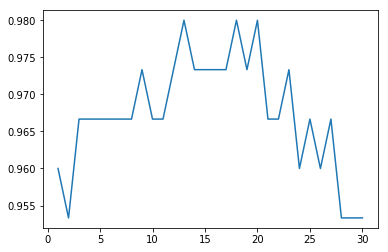

In [62]:

# 用不同参数测试对模型的影响，并返回交叉验证后的平均准确率
k_range = range(1,31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X,y,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())

plt.plot(k_range,k_scores);

#### 以平均方差判断回归模型的好坏

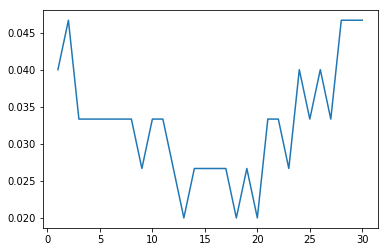

In [66]:
k_range = range(1,31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = -cross_val_score(knn,X,y,cv=10,scoring='neg_mean_squared_error')
    k_scores.append(scores.mean())

plt.plot(k_range,k_scores);

#### learing curve 可以很直观的看出我们的model学习进度，对比发现有没有overfitting的问题

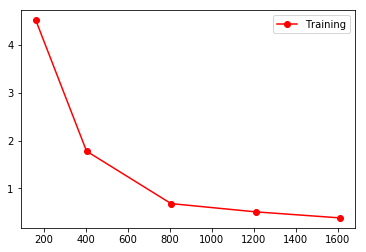

In [70]:
from sklearn.learning_curve import learning_curve 
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target

train_sizes,train_loss,test_loss = learning_curve(
    SVC(gamma=0.001),X,y,cv=10,scoring='neg_mean_squared_error',
    train_sizes = [0.1,0.25,0.5,0.75,1]
)

train_loss_mean = - np.mean(train_loss,axis=1)
train_loss_mean = - np.mean(test_loss,axis=1)

plt.plot(train_sizes,train_loss_mean,'o-',color='r',label="Training")
#plt.plot(train_sizes,test_loss_mean,'o-',color="g",label="Cross-validation")
plt.legend(loc="best")

#### 保存模型

In [78]:
# 使用pickle保存
import pickle

with open('csvs/test.pickle','wb') as f:
    pickle.dump(model,f)

# 读取
with open('csvs/test.pickle','rb') as f:
    clf2 = pickle.load(f)
    
# 使用joblib保存
from sklearn.externals import joblib
joblib.dump(model,'csvs/test1.pkl')
# 读取
clf3 = joblib.load('csvs/test1.pkl')

['csvs/test1.pkl']